# Generating prior frequency distribution file with different time offset

In [1]:
import os
import sys
sys.path.append("C:\\Users\\wqiang\\QishiQR\\")
from Utils.lm import *

# train model and generate new with varying frequencies
lm_model = LM_model(m=3, n=11, data_root_dir=r'../Data', output=r'../Output')
# t = ['1601', '1602'] # for testing
# ag_strategy_1701 = lm_model.LM_set(commodity='ag', exp_list=t, flg='train', freq=5, interval=1)

zn_contracts = ['1601', '1602', '1603', '1604', '1605', '1606', '1607', '1608', '1609', '1610', '1611', '1612', '1701', '1702', '1703', '1704', '1705', '1706', '1707', '1708', '1709', '1710', '1711', '1712']
zn_strategy = lm_model.LM_set(commodity='zn', exp_list=zn_contracts, flg='train', freq=15, interval=3)
zn_strategy.to_csv(r'../Strategy/zn_15min_strategy_t.csv', index=False)


0.3min
============zn train============
----------Running:1601----------
total lines: 0, with 0 lines selected as major contract
----------Running:1602----------
total lines: 0, with 0 lines selected as major contract
----------Running:1603----------
select data of 1603 start from 2016-1-1 09:00:00.0 to 2016-1-31 23:59:59.0
total lines: 1192, with 1192 lines selected as major contract
----------Running:1604----------
select data of 1604 start from 2016-2-1 09:00:00.0 to 2016-2-29 23:59:59.0
total lines: 668, with 668 lines selected as major contract
----------Running:1605----------
select data of 1605 start from 2016-3-1 09:00:00.0 to 2016-3-31 23:59:59.0
total lines: 1093, with 1093 lines selected as major contract
----------Running:1606----------
select data of 1606 start from 2016-4-1 09:00:00.0 to 2016-4-30 23:59:59.0
total lines: 972, with 972 lines selected as major contract
----------Running:1607----------
select data of 1607 start from 2016-5-1 09:00:00.0 to 2016-5-31 23:59:59.

----------Running:1605----------
select data of 1605 start from 2016-3-1 09:00:00.0 to 2016-3-31 23:59:59.0
total lines: 1093, with 1093 lines selected as major contract
----------Running:1606----------
select data of 1606 start from 2016-4-1 09:00:00.0 to 2016-4-30 23:59:59.0
total lines: 972, with 972 lines selected as major contract
----------Running:1607----------
select data of 1607 start from 2016-5-1 09:00:00.0 to 2016-5-31 23:59:59.0
total lines: 839, with 839 lines selected as major contract
----------Running:1608----------
select data of 1608 start from 2016-6-1 09:00:00.0 to 2016-6-30 23:59:59.0
total lines: 792, with 792 lines selected as major contract
----------Running:1609----------
select data of 1609 start from 2016-7-1 09:00:00.0 to 2016-7-31 23:59:59.0
total lines: 0, with 843 lines selected as major contract
----------Running:1610----------
select data of 1610 start from 2016-8-1 09:00:00.0 to 2016-8-31 23:59:59.0
total lines: 0, with 901 lines selected as major con

----------Running:1608----------
select data of 1608 start from 2016-6-1 09:00:00.0 to 2016-6-30 23:59:59.0
total lines: 792, with 792 lines selected as major contract
----------Running:1609----------
select data of 1609 start from 2016-7-1 09:00:00.0 to 2016-7-31 23:59:59.0
total lines: 0, with 843 lines selected as major contract
----------Running:1610----------
select data of 1610 start from 2016-8-1 09:00:00.0 to 2016-8-31 23:59:59.0
total lines: 0, with 901 lines selected as major contract
----------Running:1611----------
select data of 1611 start from 2016-9-1 09:00:00.0 to 2016-9-30 23:59:59.0
total lines: 0, with 780 lines selected as major contract
----------Running:1612----------
select data of 1612 start from 2016-10-1 09:00:00.0 to 2016-10-31 23:59:59.0
total lines: 0, with 492 lines selected as major contract
----------Running:1701----------
select data of 1701 start from 2016-11-1 09:00:00.0 to 2016-11-30 23:59:59.0
total lines: 0, with 1254 lines selected as major contra

# Backtesting with IN SAMPLE data

In [3]:
import os
import sys
sys.path.append("C:\\Users\\wqiang\\QishiQR\\")
import pandas as pd
import numpy as np
from Backtesting.Vectorized.lm_validation import LmValidation
import numpy as np

zn_strategy = pd.read_csv(r'../Strategy/zn_5min_strategy_t.csv')
slm = zn_strategy[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
max_prior = np.array(slm.loc[:, '0':'2'].max(axis=1))
tot_prior = np.array(slm.loc[:,'total'])
sig_prior = np.array(slm.loc[:,'signal'])
prior = np.array(slm.loc[:,'prior'])
prior_weight = [np.sqrt(2**(len(i)-1)) for i in prior]
max_ratio_over = max_prior/tot_prior-0.33333
prior_ratio_noise = np.sqrt((max_prior+tot_prior)/(max_prior*tot_prior))
cL = max_ratio_over/ prior_ratio_noise
mask = np.where(sig_prior=='0', 0, 1)
cL = cL*mask/np.nanmax(cL*mask)*prior_weight
slm['CL'] = cL
slm = slm.fillna(0)
#slm_filt = slm.groupby('Date')[['LastPrice']]['CL'].nlargest[10]
lm_validation = LmValidation(slm, symbol = 'zn*', data_dir = r'../Output', 
                             valid_dir = r'../Validation_IS', max_order = 8, tca = 'Fixed', opt = None, data_mode = 'Insample')
lm_validation.run()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
C:\Users\wqiang\QishiQR\Backtesting\Vectorized\backtest.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['return'][0] = 0.0
C:\Users\wqiang\QishiQR\Backtesting\Vectorized\backtest.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


FileNotFoundError: File b'../Output/zn_15min_0.3all.csv' does not exist

# Backtesting with OUT SAMPLE data

In [ ]:
import os
import sys
sys.path.append("C:\\Users\\wqiang\\QishiQR\\")
import pandas as pd
import numpy as np
from Backtesting.Vectorized.lm_validation import LmValidation
import numpy as np

zn_strategy = pd.read_csv(r'../Strategy/zn_5min_strategy_t.csv')
slm = zn_strategy[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
prior = np.array(slm.loc[:,'prior'])
prior_weight = [np.sqrt(2**(len(i)-1)) for i in prior]
max_ratio_over = max_prior/tot_prior-0.33333
prior_ratio_noise = np.sqrt((max_prior+tot_prior)/(max_prior*tot_prior))
cL = max_ratio_over/ prior_ratio_noise
mask = np.where(sig_prior=='0', 0, 1)
cL = cL*mask/np.nanmax(cL*mask)*prior_weight
slm['CL'] = cL
slm = slm.fillna(0)
lm_validation = LmValidation(slm, symbol = 'zn*', data_dir = r'../Output', valid_dir = r'../Validation_OS', max_order = 8, tca = 'Fixed', opt = None, data_mode = 'Outsample')
lm_validation.run()

In [16]:
import os
import sys
sys.path.append("C:\\Users\\maxwell\\QishiQR\\")
import pandas as pd
import numpy as np
from Backtesting.Vectorized.lm_validation import LmValidation
import numpy as np

zn_strategy = pd.read_csv(r'../Strategy/zn_5min_strategy_all.csv')
slm = zn_strategy[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
max_prior = np.array(slm.loc[:, '0':'2'].max(axis=1))
tot_prior = np.array(slm.loc[:,'total'])
sig_prior = np.array(slm.loc[:,'signal'])
prior = np.array(slm.loc[:,'prior'])
prior_weight = [np.sqrt(2**(len(i)-1)) for i in prior]
max_ratio_over = max_prior/tot_prior-0.33333
prior_ratio_noise = np.sqrt((max_prior+tot_prior)/(max_prior*tot_prior))
cL = max_ratio_over/ prior_ratio_noise
mask = np.where(sig_prior=='0', 0, 1)
cL = cL*mask/np.nanmax(cL*mask)*prior_weight
slm['CL'] = cL
slm = slm.fillna(0)
print(slm.sort_values('CL'))


            prior       0       1       2   total signal        CL
0               p  515901  118818  122274  756993      0  0.000000
8147   p021110000      13       4       3      20      0  0.000000
8148   p021110001       0       0       0       0      0  0.000000
8149   p021110002       6       1       1       8      0  0.000000
8150    p02111001       4       4       3      11      0  0.000000
20709  p200221020       1       1       0       2      0  0.000000
8152   p021110011       2       1       1       4      0  0.000000
8154    p02111002       6       2       4      12      0  0.000000
8156   p021110021       1       1       0       2      0  0.000000
20704   p20022101       5       4       2      11      0  0.000000
20702  p200221001       3       3       2       8      0  0.000000
20701  p200221000       8       1       1      10      0  0.000000
8162   p021110102       3       1       2       6      0  0.000000
20700   p20022100      10       8       1      19      0  0.00

C:\Users\maxwell\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
C:\Users\maxwell\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


# Performance comparison 

# 1. Major contract for both trainning and validation

## Major contract data only, without trading cost, no sizing optimization

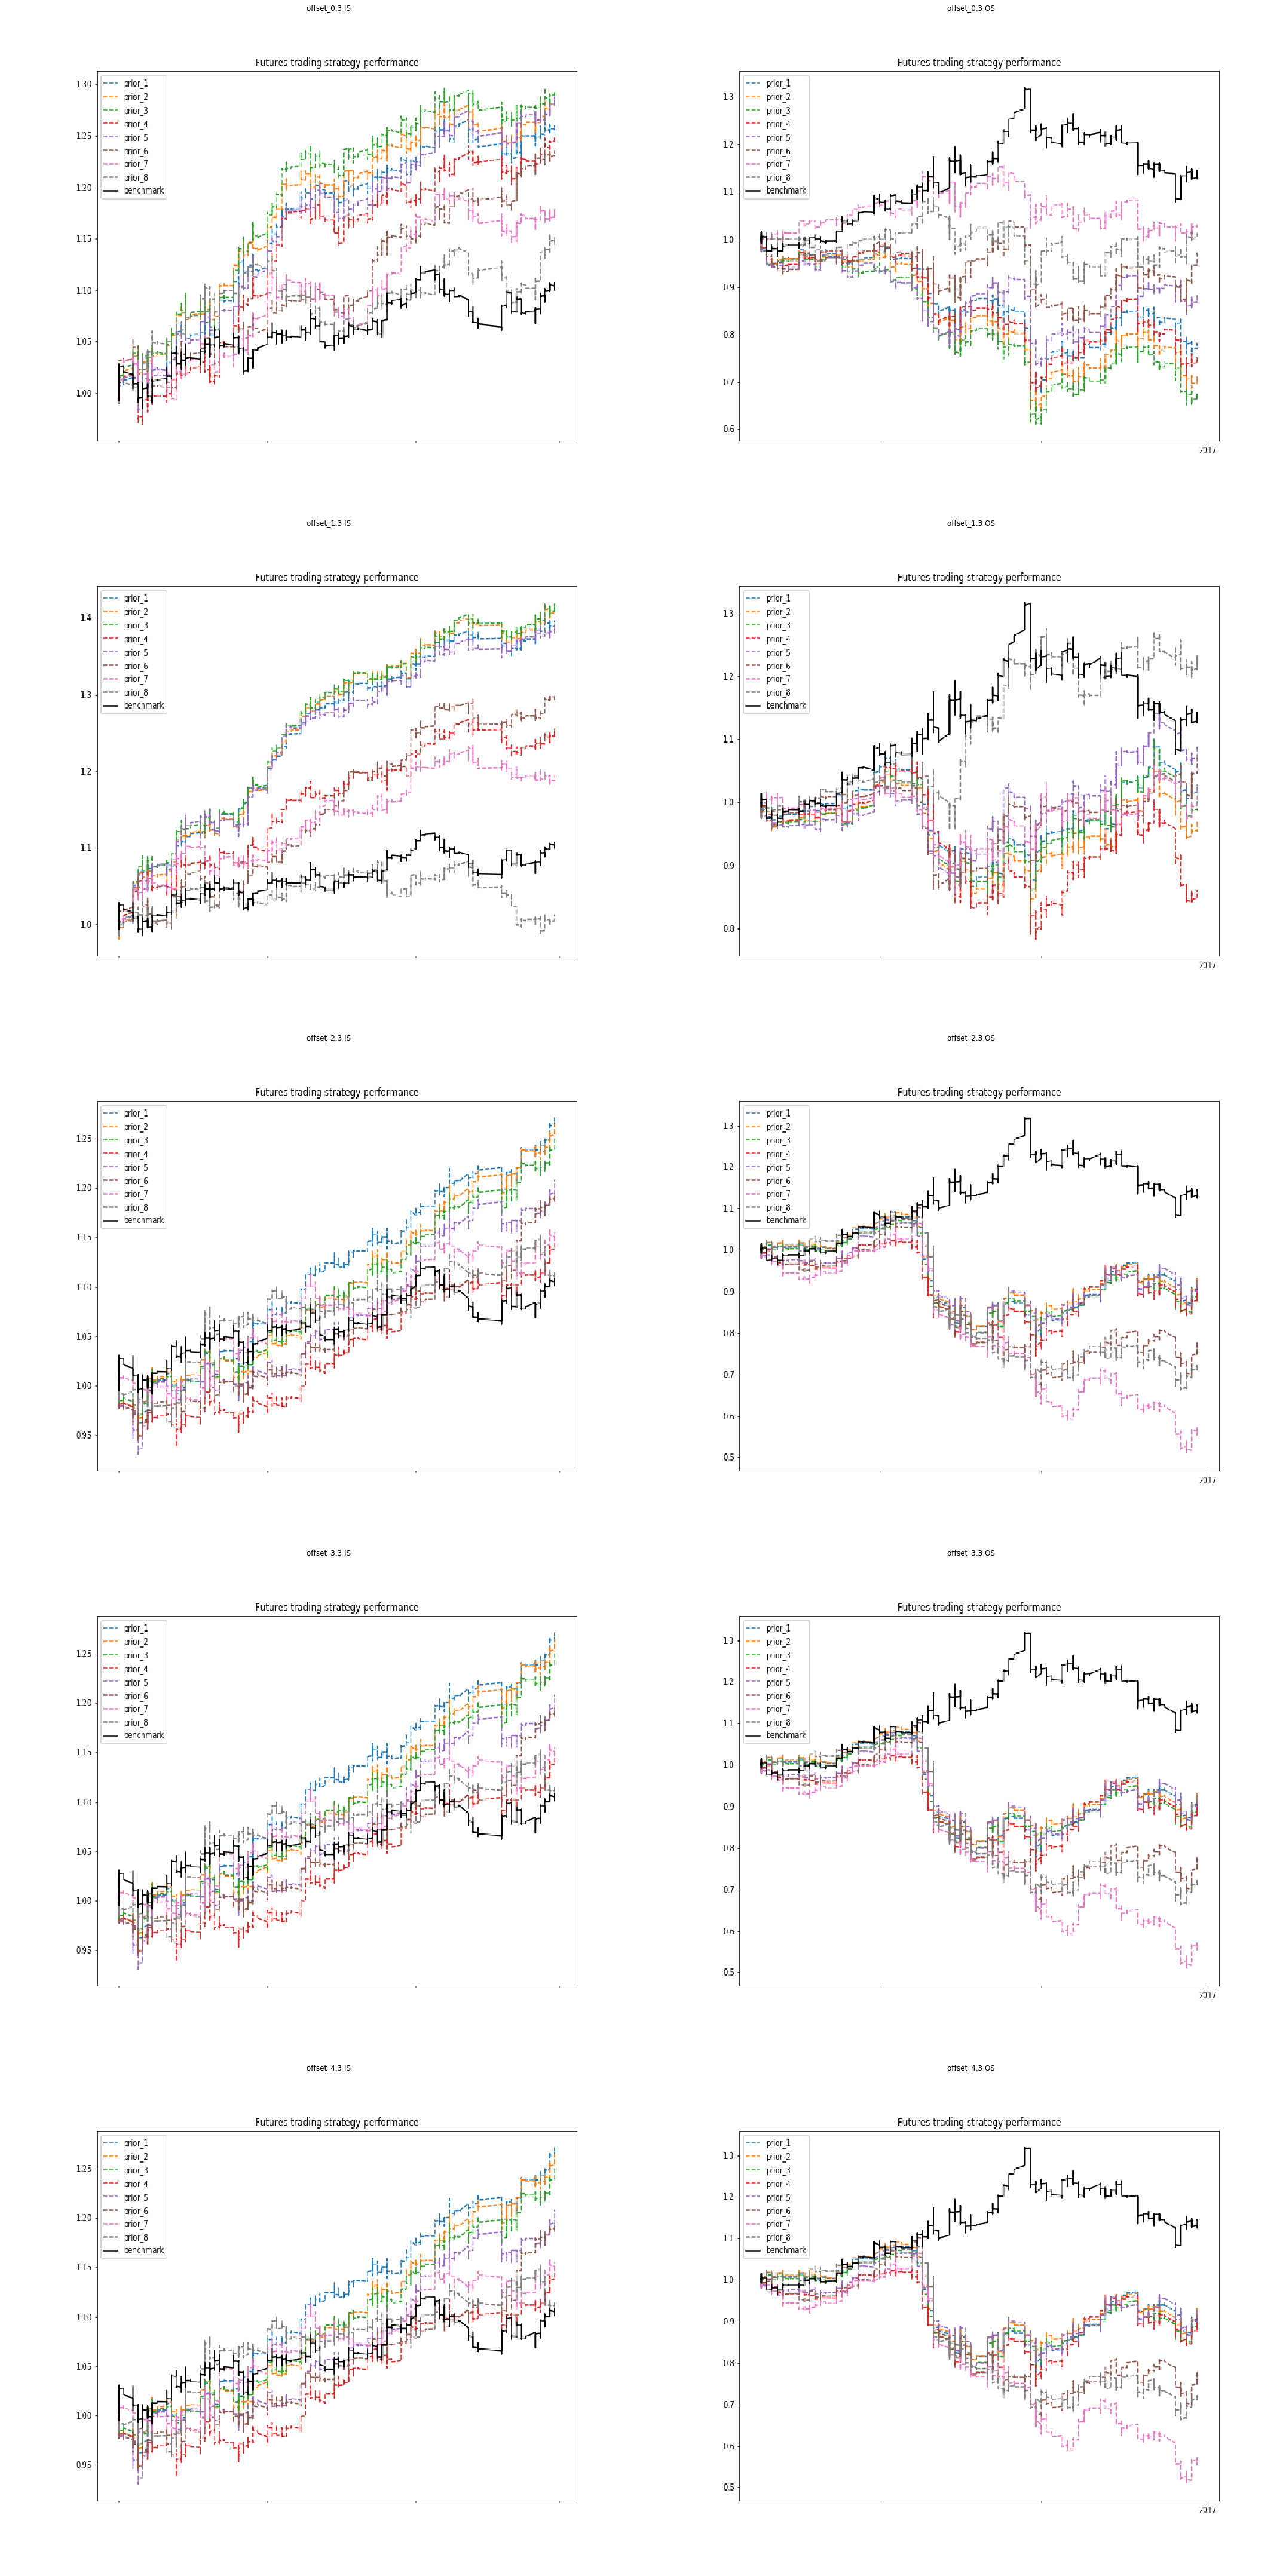

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img0=mpimg.imread('../Validation_IS_Maj_All/performance_zn_5min_0.3all.png')
img1=mpimg.imread('../Validation_IS_Maj_All/performance_zn_5min_1.3all.png')
img2=mpimg.imread('../Validation_IS_Maj_All/performance_zn_5min_2.3all.png')
img3=mpimg.imread('../Validation_IS_Maj_All/performance_zn_5min_3.3all.png')
img4=mpimg.imread('../Validation_IS_Maj_All/performance_zn_5min_4.3all.png')
img0_1=mpimg.imread('../Validation_OS_Maj_All/performance_zn_5min_0.3all.png')
img1_1=mpimg.imread('../Validation_OS_Maj_All/performance_zn_5min_1.3all.png')
img2_1=mpimg.imread('../Validation_OS_Maj_All/performance_zn_5min_2.3all.png')
img3_1=mpimg.imread('../Validation_OS_Maj_All/performance_zn_5min_3.3all.png')
img4_1=mpimg.imread('../Validation_OS_Maj_All/performance_zn_5min_4.3all.png')
fig, axarr= plt.subplots(5, 2, figsize = (30, 60))
axarr[0,0].imshow(img0,aspect='auto')
axarr[0,0].set_title('offset_0.3 IS')
axarr[0,0].axis('off')
axarr[0,1].imshow(img0_1,aspect='auto')
axarr[0,1].set_title('offset_0.3 OS')
axarr[0,1].axis('off')
axarr[1,0].imshow(img1,aspect='auto')
axarr[1,0].set_title('offset_1.3 IS')
axarr[1,0].axis('off')
axarr[1,1].imshow(img1_1,aspect='auto')
axarr[1,1].set_title('offset_1.3 OS')
axarr[1,1].axis('off')
axarr[2,0].imshow(img2,aspect='auto')
axarr[2,0].set_title('offset_2.3 IS')
axarr[2,0].axis('off')
axarr[2,1].imshow(img2_1,aspect='auto')
axarr[2,1].set_title('offset_2.3 OS')
axarr[2,1].axis('off')
axarr[3,0].imshow(img2,aspect='auto')
axarr[3,0].set_title('offset_3.3 IS')
axarr[3,0].axis('off')
axarr[3,1].imshow(img2_1,aspect='auto')
axarr[3,1].set_title('offset_3.3 OS')
axarr[3,1].axis('off')
axarr[4,0].imshow(img2,aspect='auto')
axarr[4,0].set_title('offset_4.3 IS')
axarr[4,0].axis('off')
axarr[4,1].imshow(img2_1,aspect='auto')
axarr[4,1].set_title('offset_4.3 OS')
axarr[4,1].axis('off')
plt.tight_layout()
plt.show()

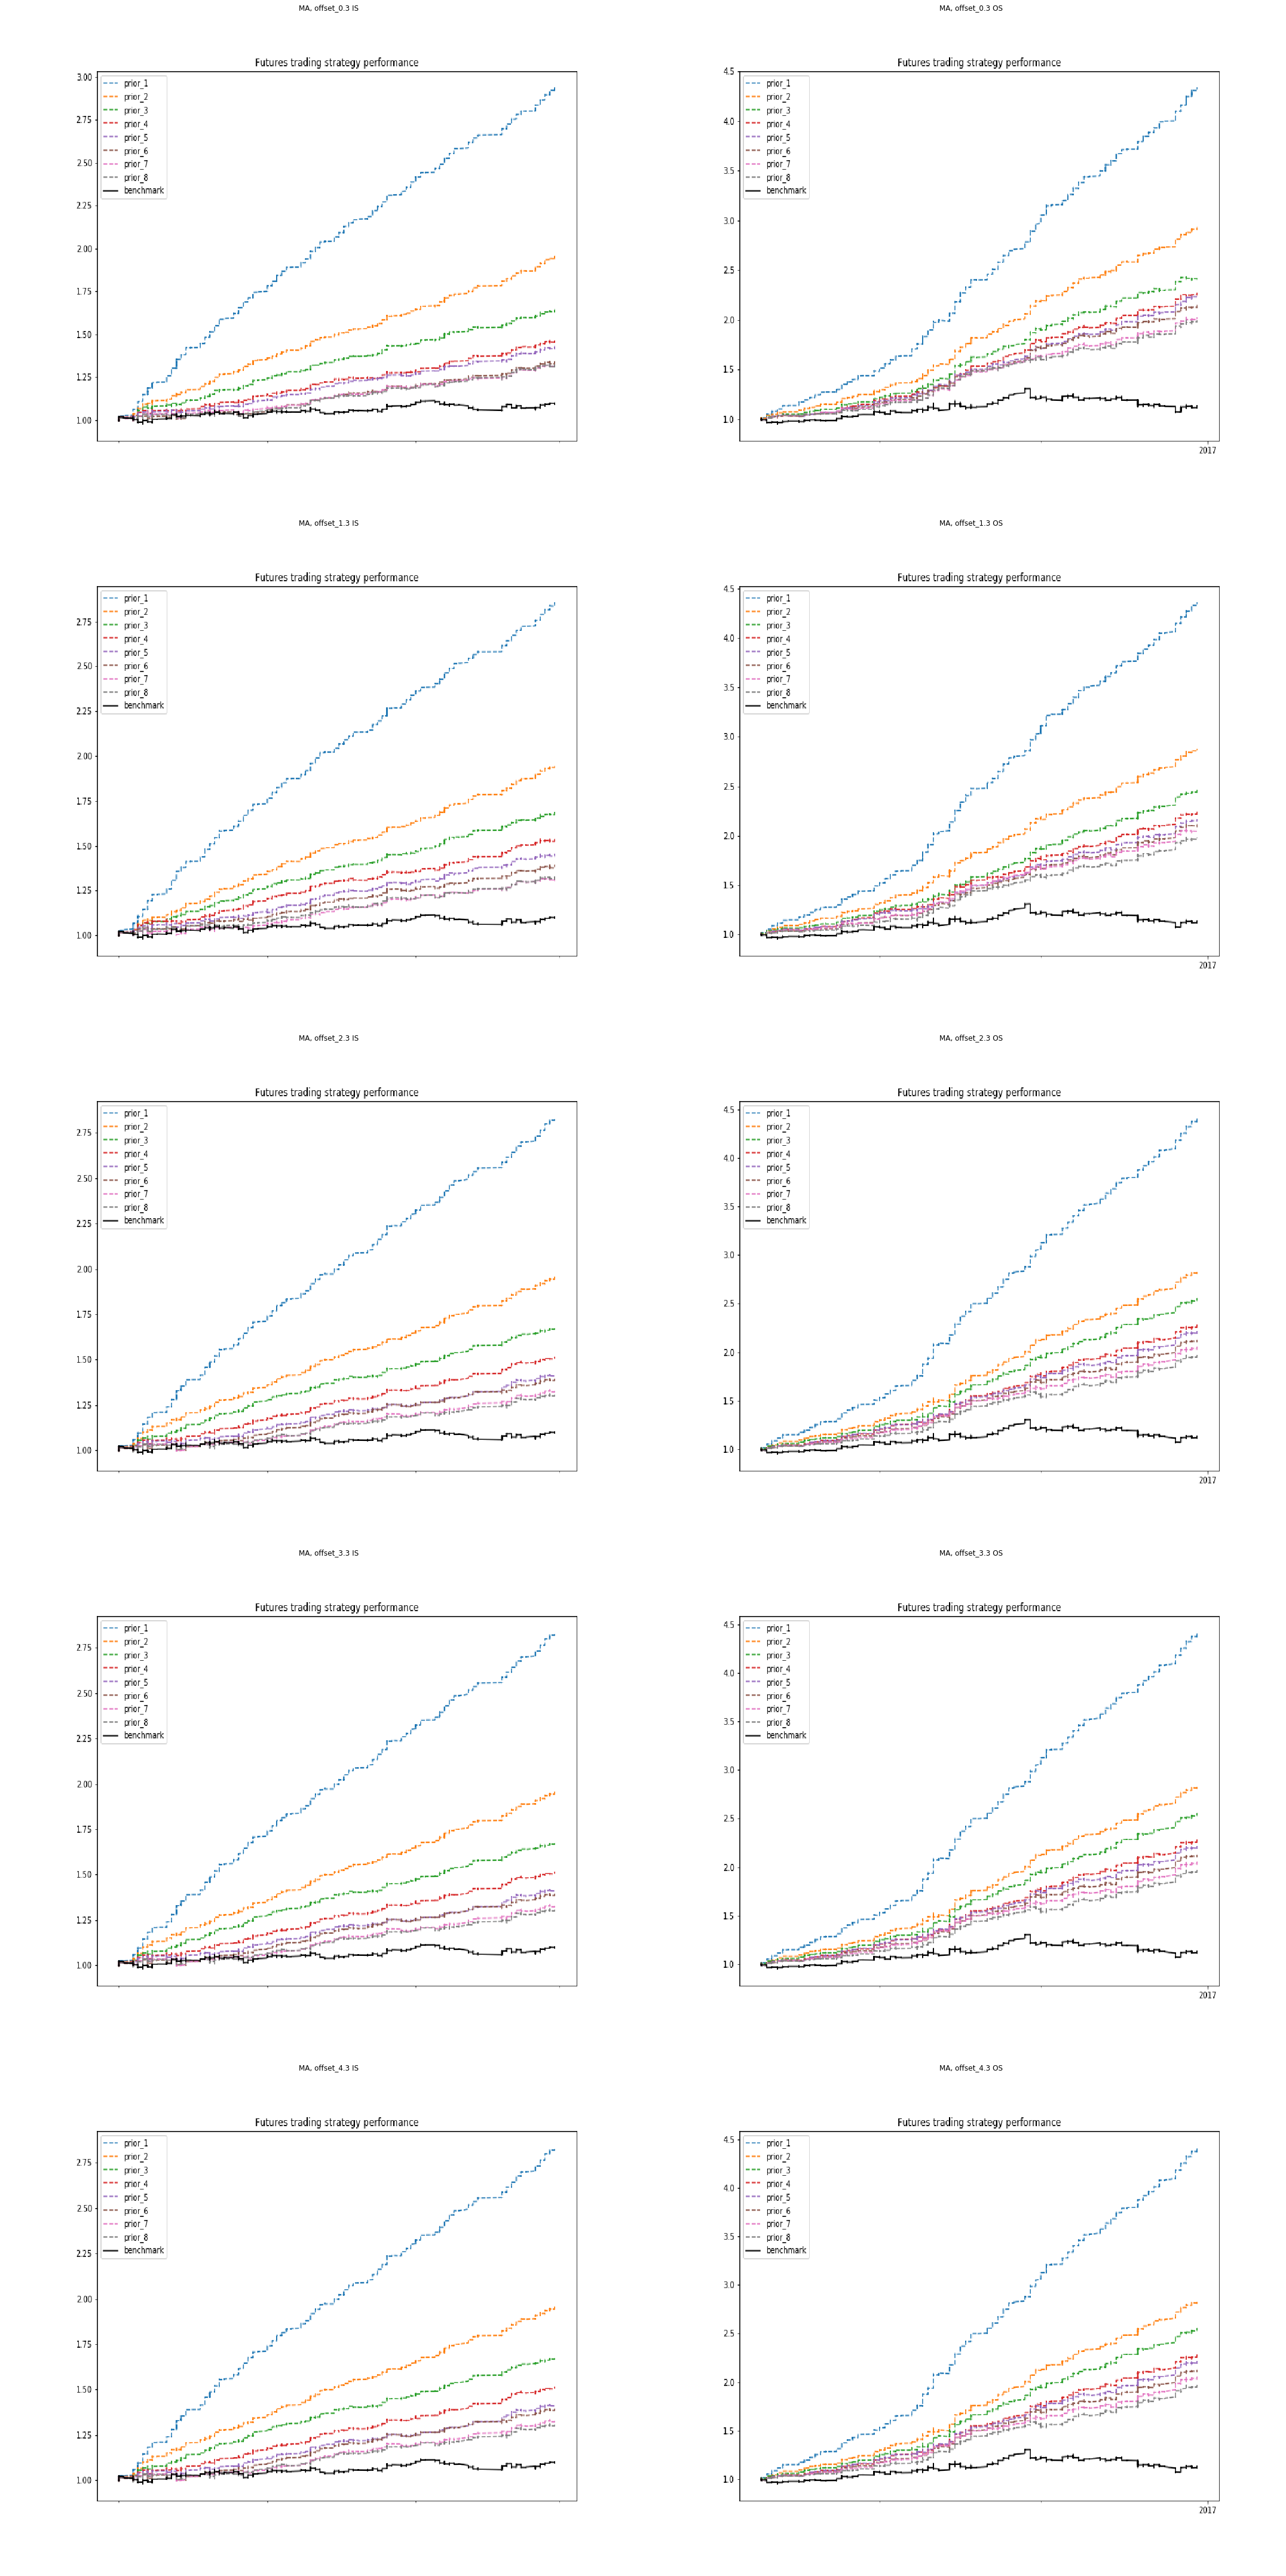

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img0=mpimg.imread('../Validation_IS_5min_Maj_All_MA/performance_zn_5min_0.3all.png')
img1=mpimg.imread('../Validation_IS_5min_Maj_All_MA/performance_zn_5min_1.3all.png')
img2=mpimg.imread('../Validation_IS_5min_Maj_All_MA/performance_zn_5min_2.3all.png')
img3=mpimg.imread('../Validation_IS_5min_Maj_All_MA/performance_zn_5min_3.3all.png')
img4=mpimg.imread('../Validation_IS_5min_Maj_All_MA/performance_zn_5min_4.3all.png')
img0_1=mpimg.imread('../Validation_OS_5min_Maj_All_MA/performance_zn_5min_0.3all.png')
img1_1=mpimg.imread('../Validation_OS_5min_Maj_All_MA/performance_zn_5min_1.3all.png')
img2_1=mpimg.imread('../Validation_OS_5min_Maj_All_MA/performance_zn_5min_2.3all.png')
img3_1=mpimg.imread('../Validation_OS_5min_Maj_All_MA/performance_zn_5min_3.3all.png')
img4_1=mpimg.imread('../Validation_OS_5min_Maj_All_MA/performance_zn_5min_4.3all.png')
fig, axarr= plt.subplots(5, 2, figsize = (30, 60))
axarr[0,0].imshow(img0,aspect='auto')
axarr[0,0].set_title('MA, offset_0.3 IS')
axarr[0,0].axis('off')
axarr[0,1].imshow(img0_1,aspect='auto')
axarr[0,1].set_title('MA, offset_0.3 OS')
axarr[0,1].axis('off')
axarr[1,0].imshow(img1,aspect='auto')
axarr[1,0].set_title('MA, offset_1.3 IS')
axarr[1,0].axis('off')
axarr[1,1].imshow(img1_1,aspect='auto')
axarr[1,1].set_title('MA, offset_1.3 OS')
axarr[1,1].axis('off')
axarr[2,0].imshow(img2,aspect='auto')
axarr[2,0].set_title('MA, offset_2.3 IS')
axarr[2,0].axis('off')
axarr[2,1].imshow(img2_1,aspect='auto')
axarr[2,1].set_title('MA, offset_2.3 OS')
axarr[2,1].axis('off')
axarr[3,0].imshow(img2,aspect='auto')
axarr[3,0].set_title('MA, offset_3.3 IS')
axarr[3,0].axis('off')
axarr[3,1].imshow(img2_1,aspect='auto')
axarr[3,1].set_title('MA, offset_3.3 OS')
axarr[3,1].axis('off')
axarr[4,0].imshow(img2,aspect='auto')
axarr[4,0].set_title('MA, offset_4.3 IS')
axarr[4,0].axis('off')
axarr[4,1].imshow(img2_1,aspect='auto')
axarr[4,1].set_title('MA, offset_4.3 OS')
axarr[4,1].axis('off')
plt.tight_layout()
plt.show()

## 15 minutes data 

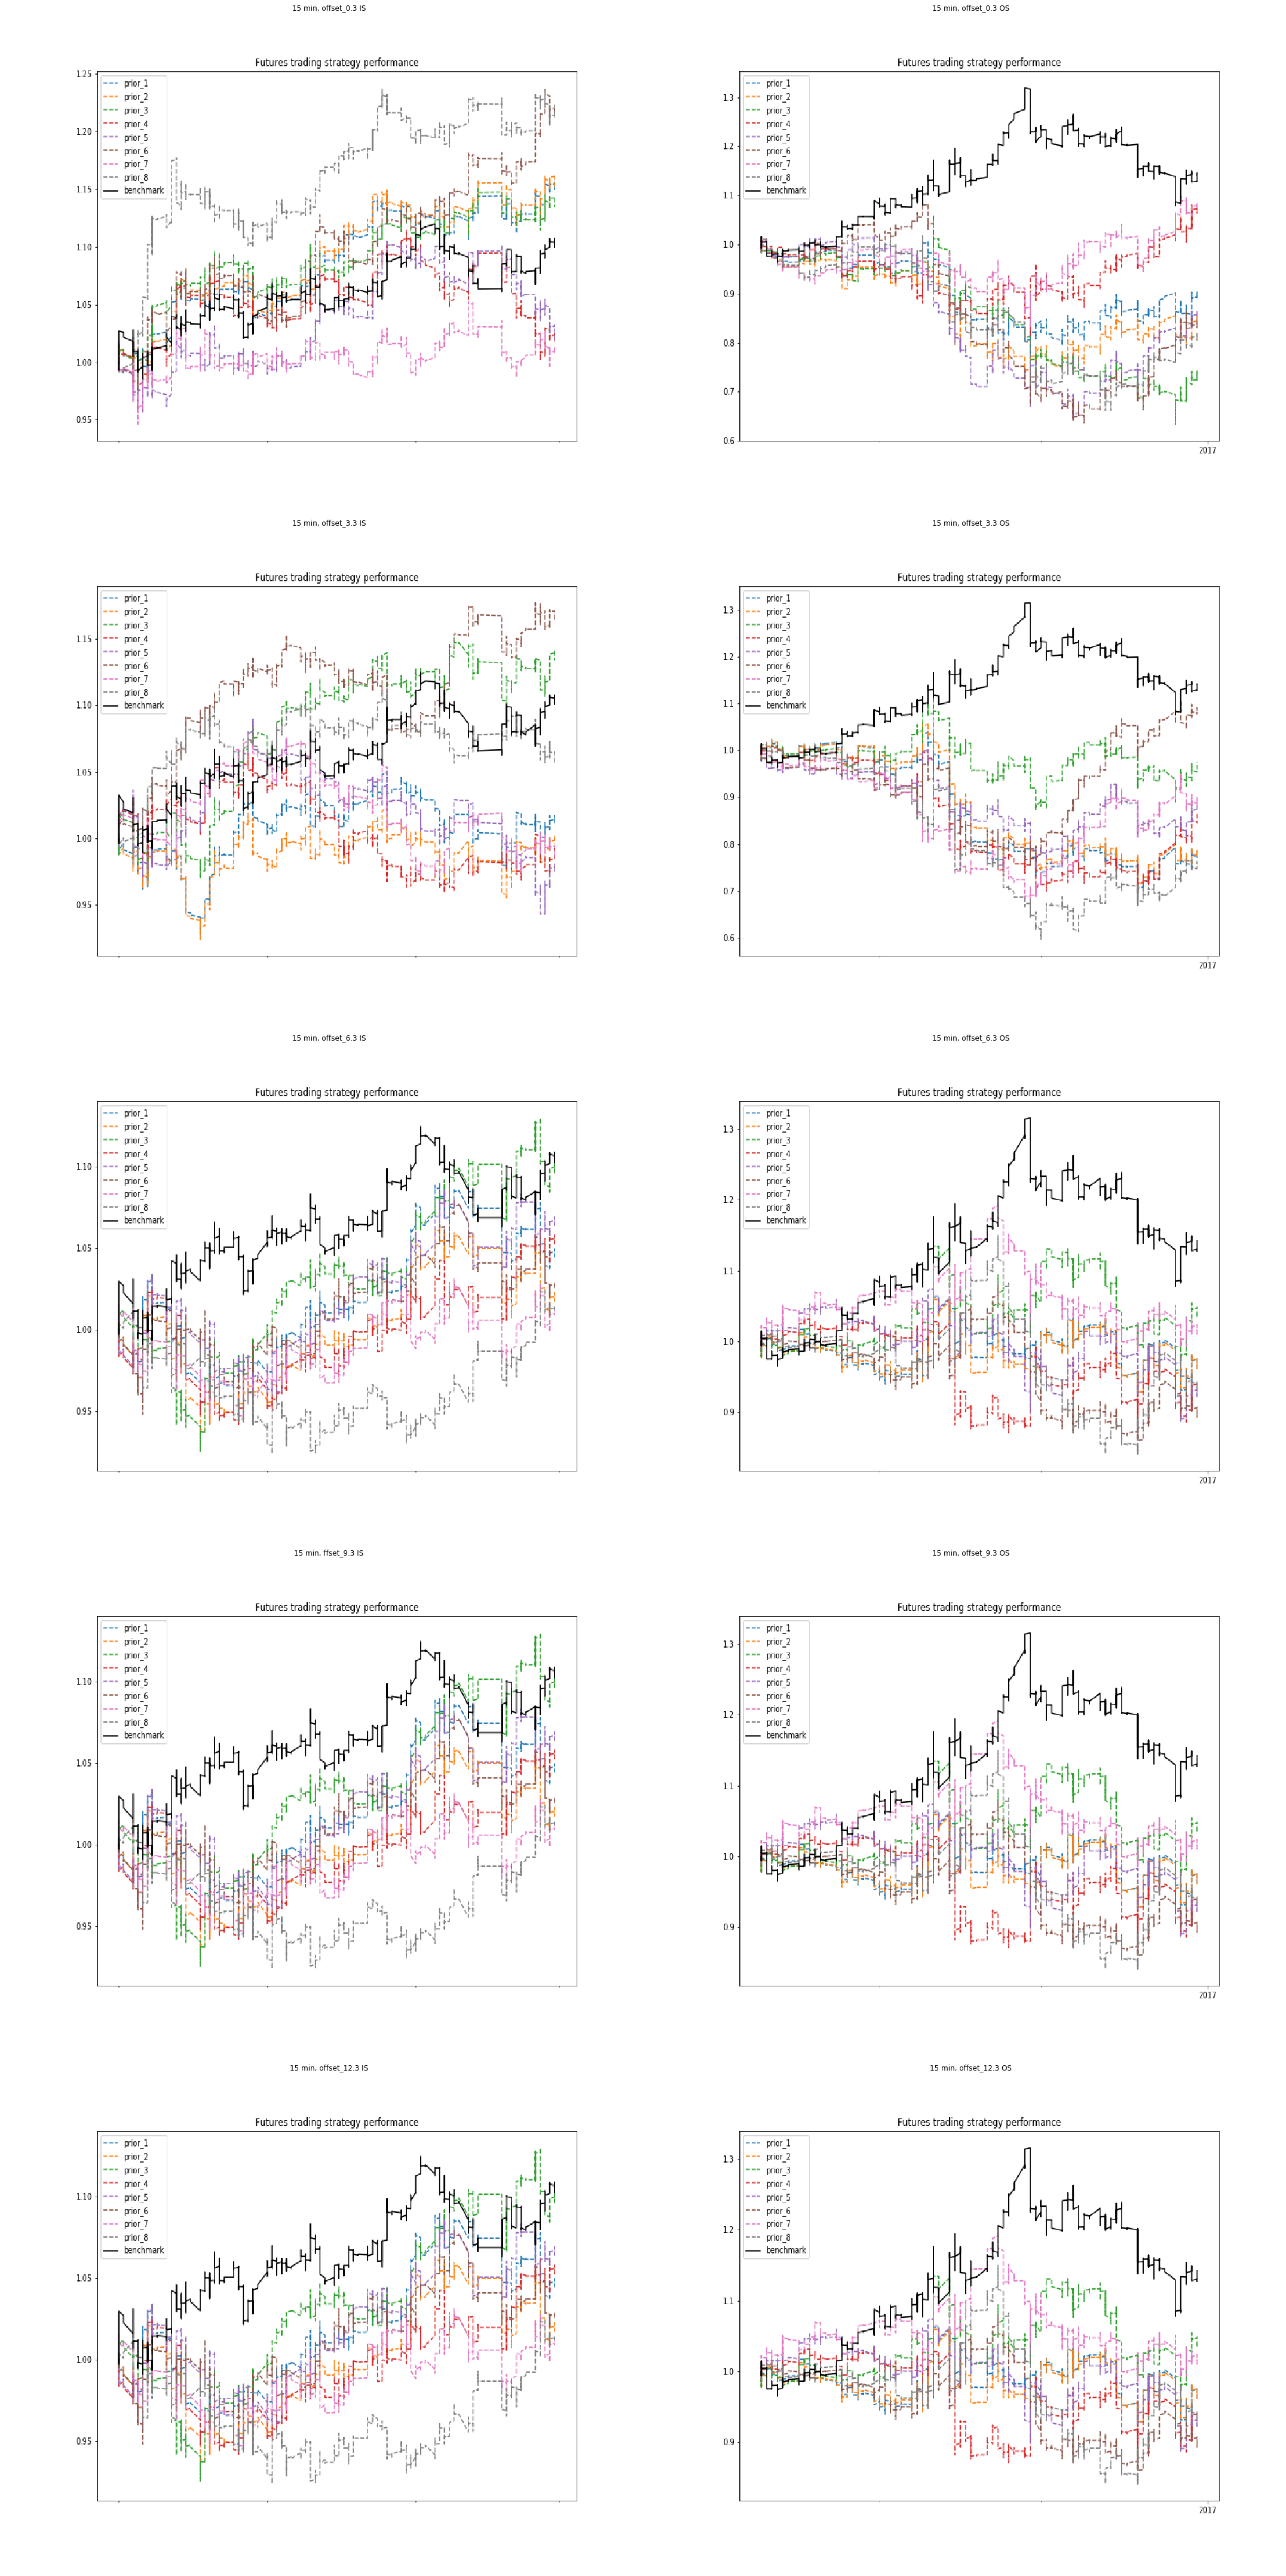

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img0=mpimg.imread('../Validation_IS_15min_Maj_All/performance_zn_15min_0.3all.png')
img1=mpimg.imread('../Validation_IS_15min_Maj_All/performance_zn_15min_3.3all.png')
img2=mpimg.imread('../Validation_IS_15min_Maj_All/performance_zn_15min_6.3all.png')
img3=mpimg.imread('../Validation_IS_15min_Maj_All/performance_zn_15min_9.3all.png')
img4=mpimg.imread('../Validation_IS_15min_Maj_All/performance_zn_15min_12.3all.png')
img0_1=mpimg.imread('../Validation_OS_15min_Maj_All/performance_zn_15min_0.3all.png')
img1_1=mpimg.imread('../Validation_OS_15min_Maj_All/performance_zn_15min_3.3all.png')
img2_1=mpimg.imread('../Validation_OS_15min_Maj_All/performance_zn_15min_6.3all.png')
img3_1=mpimg.imread('../Validation_OS_15min_Maj_All/performance_zn_15min_9.3all.png')
img4_1=mpimg.imread('../Validation_OS_15min_Maj_All/performance_zn_15min_12.3all.png')
fig, axarr= plt.subplots(5, 2, figsize = (30, 60))
axarr[0,0].imshow(img0,aspect='auto')
axarr[0,0].set_title('15 min, offset_0.3 IS')
axarr[0,0].axis('off')
axarr[0,1].imshow(img0_1,aspect='auto')
axarr[0,1].set_title('15 min, offset_0.3 OS')
axarr[0,1].axis('off')
axarr[1,0].imshow(img1,aspect='auto')
axarr[1,0].set_title('15 min, offset_3.3 IS')
axarr[1,0].axis('off')
axarr[1,1].imshow(img1_1,aspect='auto')
axarr[1,1].set_title('15 min, offset_3.3 OS')
axarr[1,1].axis('off')
axarr[2,0].imshow(img2,aspect='auto')
axarr[2,0].set_title('15 min, offset_6.3 IS')
axarr[2,0].axis('off')
axarr[2,1].imshow(img2_1,aspect='auto')
axarr[2,1].set_title('15 min, offset_6.3 OS')
axarr[2,1].axis('off')
axarr[3,0].imshow(img2,aspect='auto')
axarr[3,0].set_title('15 min, ffset_9.3 IS')
axarr[3,0].axis('off')
axarr[3,1].imshow(img2_1,aspect='auto')
axarr[3,1].set_title('15 min, offset_9.3 OS')
axarr[3,1].axis('off')
axarr[4,0].imshow(img2,aspect='auto')
axarr[4,0].set_title('15 min, offset_12.3 IS')
axarr[4,0].axis('off')
axarr[4,1].imshow(img2_1,aspect='auto')
axarr[4,1].set_title('15 min, offset_12.3 OS')
axarr[4,1].axis('off')
plt.tight_layout()
plt.show()

## Major contract data only, without trading cost, sizing optimization with CL

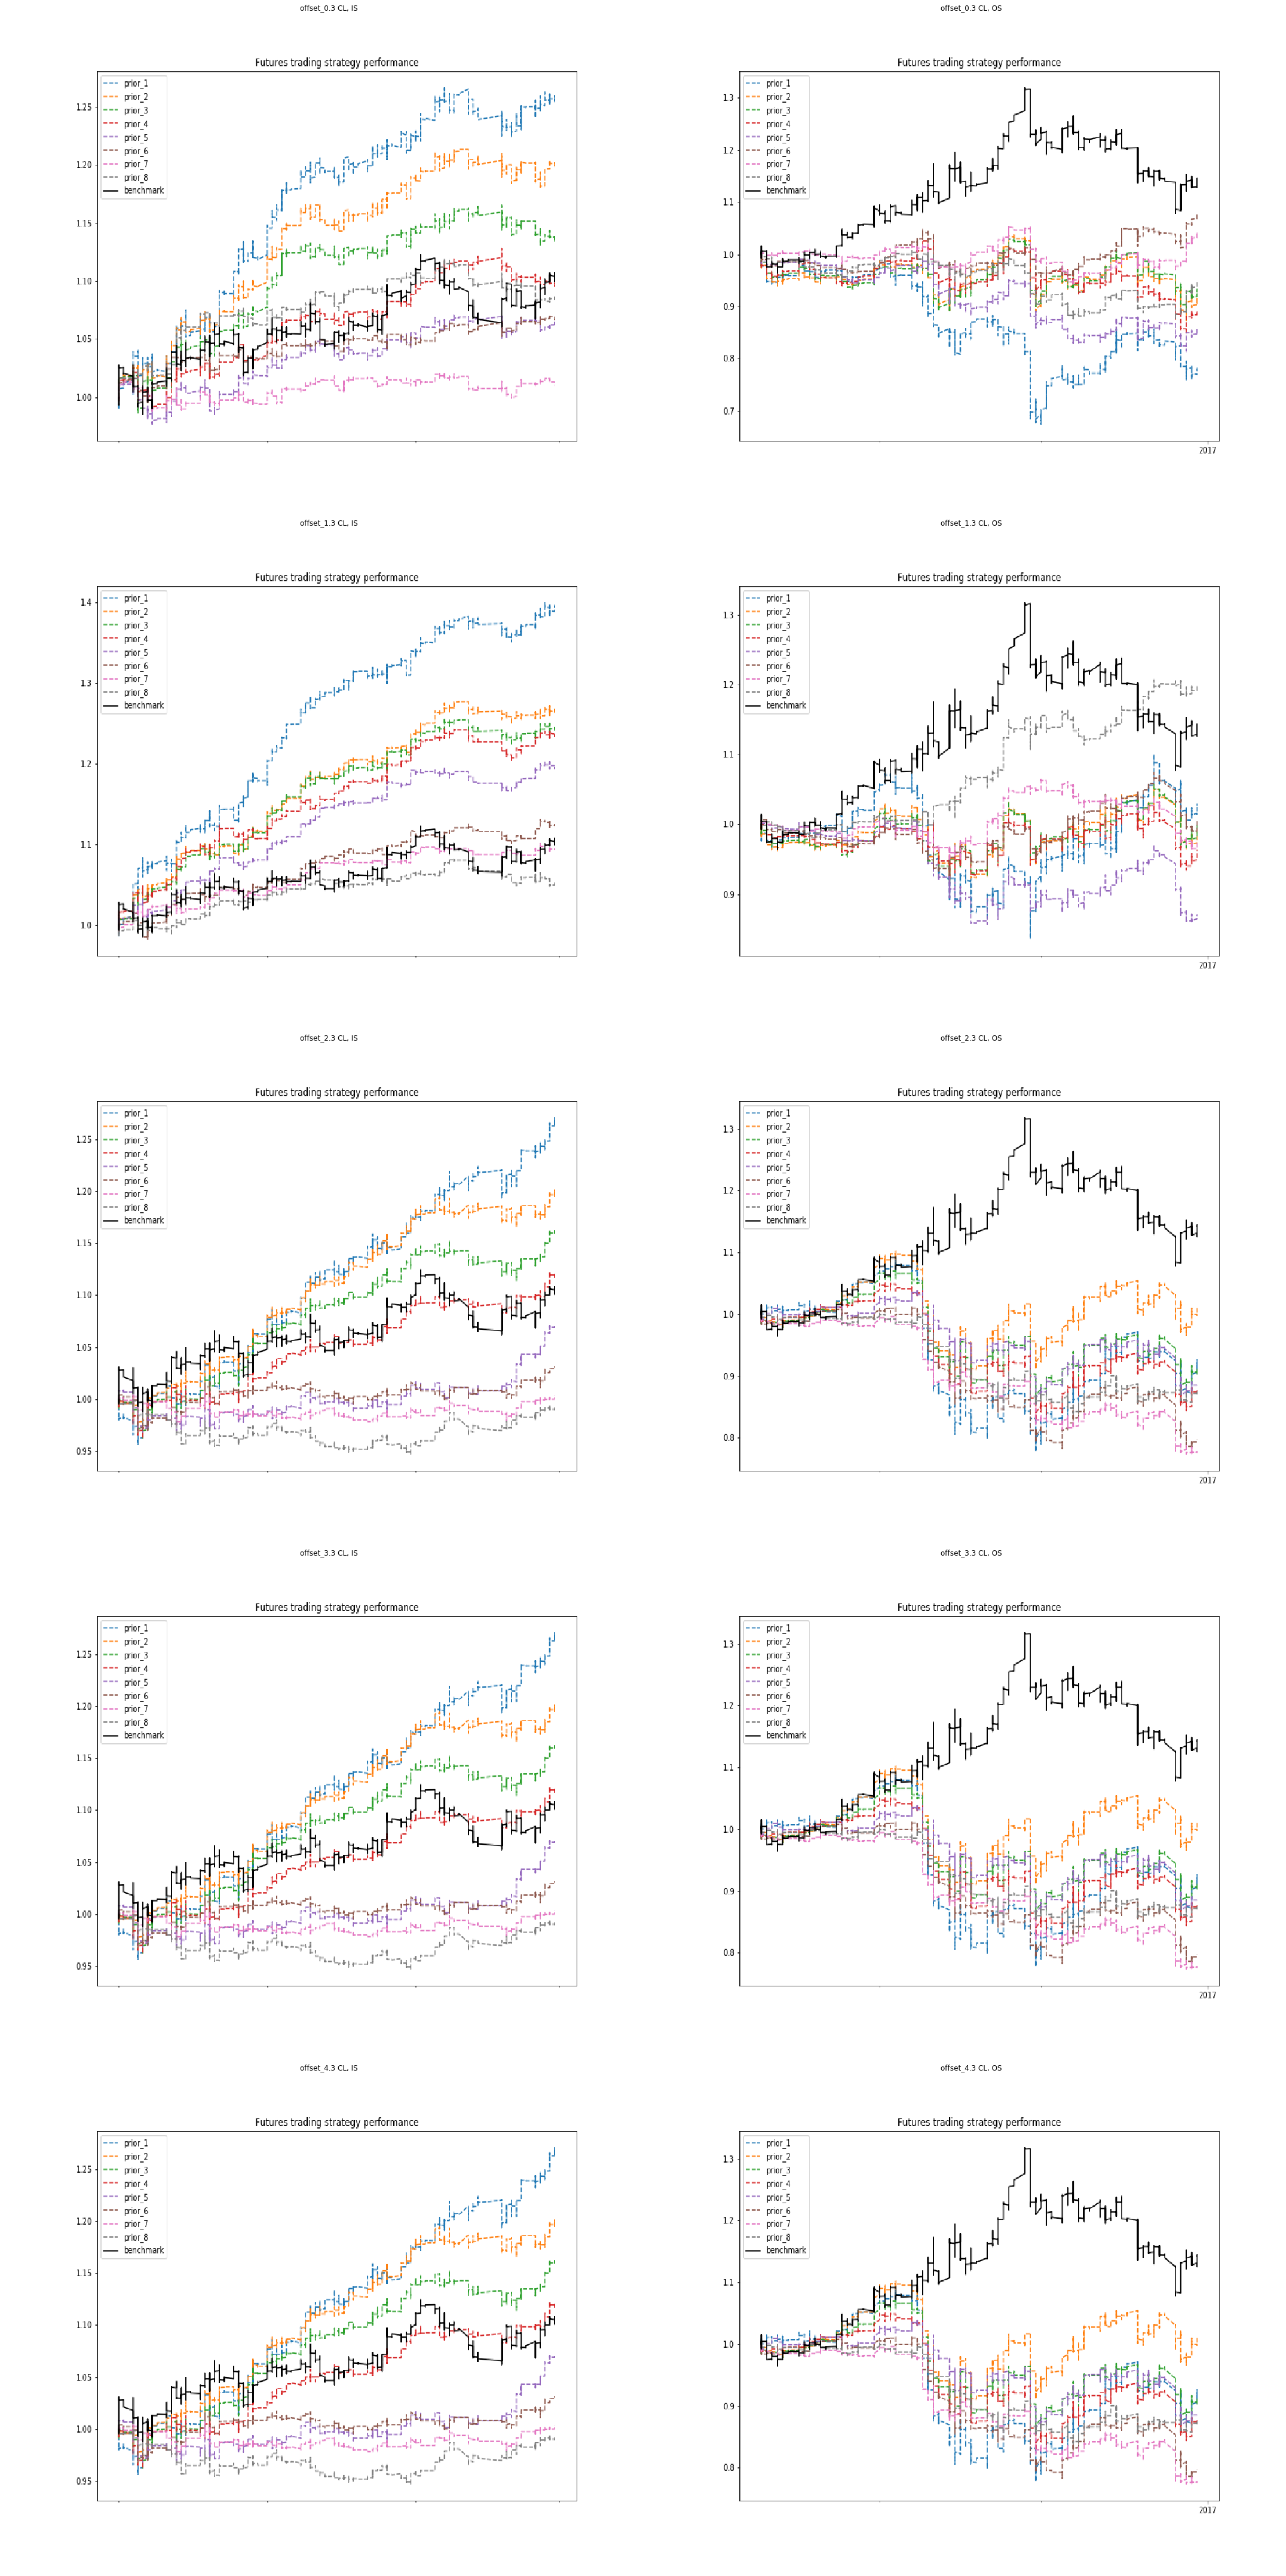

In [42]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img0=mpimg.imread('../Validation_IS_Maj_All_CL/performance_zn_5min_0.3all.png')
img1=mpimg.imread('../Validation_IS_Maj_All_CL/performance_zn_5min_1.3all.png')
img2=mpimg.imread('../Validation_IS_Maj_All_CL/performance_zn_5min_2.3all.png')
img3=mpimg.imread('../Validation_IS_Maj_All_CL/performance_zn_5min_3.3all.png')
img4=mpimg.imread('../Validation_IS_Maj_All_CL/performance_zn_5min_4.3all.png')
img0_1=mpimg.imread('../Validation_OS_Maj_All_CL/performance_zn_5min_0.3all.png')
img1_1=mpimg.imread('../Validation_OS_Maj_All_CL/performance_zn_5min_1.3all.png')
img2_1=mpimg.imread('../Validation_OS_Maj_All_CL/performance_zn_5min_2.3all.png')
img3_1=mpimg.imread('../Validation_OS_Maj_All_CL/performance_zn_5min_3.3all.png')
img4_1=mpimg.imread('../Validation_OS_Maj_All_CL/performance_zn_5min_4.3all.png')
fig, axarr= plt.subplots(5, 2, figsize = (30, 60))
axarr[0,0].imshow(img0,aspect='auto')
axarr[0,0].set_title('offset_0.3 CL, IS')
axarr[0,0].axis('off')
axarr[0,1].imshow(img0_1,aspect='auto')
axarr[0,1].set_title('offset_0.3 CL, OS')
axarr[0,1].axis('off')
axarr[1,0].imshow(img1,aspect='auto')
axarr[1,0].set_title('offset_1.3 CL, IS')
axarr[1,0].axis('off')
axarr[1,1].imshow(img1_1,aspect='auto')
axarr[1,1].set_title('offset_1.3 CL, OS')
axarr[1,1].axis('off')
axarr[2,0].imshow(img2,aspect='auto')
axarr[2,0].set_title('offset_2.3 CL, IS')
axarr[2,0].axis('off')
axarr[2,1].imshow(img2_1,aspect='auto')
axarr[2,1].set_title('offset_2.3 CL, OS')
axarr[2,1].axis('off')
axarr[3,0].imshow(img2,aspect='auto')
axarr[3,0].set_title('offset_3.3 CL, IS')
axarr[3,0].axis('off')
axarr[3,1].imshow(img2_1,aspect='auto')
axarr[3,1].set_title('offset_3.3 CL, OS')
axarr[3,1].axis('off')
axarr[4,0].imshow(img2,aspect='auto')
axarr[4,0].set_title('offset_4.3 CL, IS')
axarr[4,0].axis('off')
axarr[4,1].imshow(img2_1,aspect='auto')
axarr[4,1].set_title('offset_4.3 CL, OS')
axarr[4,1].axis('off')
plt.tight_layout()
plt.show()